<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [0]:
train_dir = "drive/My Drive/train/"
test_dir = "drive/My Drive/test1/"

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [0]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    label = img[:3]
    if label == 'cat':
        return np.array([1,0])
    return np.array([0,1])

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [0]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data(train_dir):
    data = []
    for fn in tqdm(os.listdir(train_dir)):
        label = label_img(fn)
        img = cv2.imread(os.path.join(train_dir, fn))
        img = cv2.resize(img, (227,227))
        data.append([img, label])
    shuffle(data)
    return data 
    

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [0]:
def create_test_data(test_dir):
    data = []
    for fn in tqdm(os.listdir(test_dir)):
        img = cv2.imread(os.path.join(test_dir, fn))
        img = cv2.resize(img, (227,227))
        data.append(img)
    shuffle(data)
    return data  

<p style="font-size:20px">Step 4: create your train and test data</p>

In [19]:
train_data = create_train_data(train_dir)

100%|██████████| 25000/25000 [2:14:32<00:00,  2.76it/s]


In [20]:
test_data = create_test_data(test_dir)

100%|██████████| 12500/12500 [1:17:20<00:00,  3.07it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

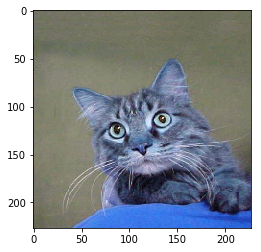

In [21]:
plt.imshow(train_data[0][0])

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [22]:
train_all_im = np.array([data[0] for data in train_data])
train_all_label = np.array([data[1] for data in train_data])
test_im = np.array(test_data)
val_im, train_im = train_all_im[:500], train_all_im[500:]
val_label, train_label = train_all_label[:500], train_all_label[500:]
print(train_im.shape)
print(val_im.shape)
print(test_im.shape)
print(train_label.shape)
print(val_label.shape)

(24500, 227, 227, 3)
(500, 227, 227, 3)
(12500, 227, 227, 3)
(24500, 2)
(500, 2)


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [23]:
for i in range(5):
    with open('dogs-vs-cats-train-image-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 24500:
            print(5000*i)
            pickle.dump(train_im[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(train_im[5000*i:5000*(i+1)], f)
    with open('dogs-vs-cats-train-label-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 24500:
            print(5000*i)
            pickle.dump(train_label[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(train_label[5000*i:5000*(i+1)], f)
with open('dogs-vs-cats-val-image.pickle', 'wb') as f:
    pickle.dump(val_im, f)
with open('dogs-vs-cats-val-label.pickle', 'wb') as f:
    pickle.dump(val_label, f)
for i in range(3):
    with open('dogs-vs-cats-test-image-'+str(i)+'.pickle', 'wb') as f:
        if 5000*(i+1) > 12500:
            print(5000*i)
            pickle.dump(test_im[5000*i:], f)
        else:
            print(5000*i, 5000*(i+1))
            pickle.dump(test_im[5000*i:5000*(i+1)], f)

0 5000
0 5000
5000 10000
5000 10000
10000 15000
10000 15000
15000 20000
15000 20000
20000
20000
0 5000
5000 10000
10000
